# Stochastic Simulation Assignment 2
- Dennis Curti (14526263)
- Sjoerd Dronkers (13420607)

In [4]:
%pip install simpy
%pip install scipy


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 32.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: pip3.11 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [42]:
import matplotlib.pyplot as plt
import numpy as np
import simpy as sim
import scipy.stats as sp

## General Functions

In [43]:
def confidence_interval(mean, sem):
    """
    Compute the 95% confidence interval.
    """
    z = 1.96
    return [mean - z * sem, mean + z * sem]

In [44]:
def customer(env, servers, name, service_rate):
    """
    Function to act as a customer.
    """

    arrival = env.now

    with servers.server.request() as request:
        yield request

        # Process the customer through the server.
        yield env.process(servers.processing(service_rate))
        leave_time = env.now

        # Store waiting time spent in the queue.
        servers.waiting_times.append(leave_time - arrival - servers.service_times[-1])

In [45]:
def setup(env, servers, n, no_customers, service_time, arrival_rate):
    """
    Main function to run the system.
    """

    # Go through the number of customers to be served.
    for i in range(no_customers):
        env.process(customer(env, servers, f'Person {i}', service_time))
        yield env.timeout(np.random.exponential(arrival_rate))

## Question 2

In [46]:
class Servers(object):
    """
    Class to simulate behaviour of the servers. It processes the customers for
    the pre determined service time and tracks this time.
    """

    def __init__(self, env, n, service_time):
        """
        Initialize Server object.
        self.waiting_times keeps track of the time spend in the queue.
        self.service_times tracks the time spend in the serves.
        """

        self.env = env
        self.server = sim.Resource(env, n)
        self.waiting_times = list()
        self.service_times = list()

    def processing(self, service_rate):
        """
        Process a customer for the determined service_time and store this time
        spent in self.service_times.
        """

        self.service_times.append(np.random.exponential(service_rate))
        yield self.env.timeout(self.service_times[-1])


In [47]:
def simulation(n, no_customers, service_time, arrival_rate, run_time) -> list:
    env = sim.Environment()
    servers = Servers(env, n, service_time)
    env.process(setup(env, servers, n, no_customers, service_time, arrival_rate))
    env.run(until=run_time)
    return servers.waiting_times, servers.service_times

In [117]:
# Check if it works for simple cases (Calculated by hand).
# Does not work anymore after switching from deterministic to memoryless
# assert simulation(1, 2, 10, 5, 1000)[0][1] == 5
# assert simulation(2, 2, 10, 5, 1000)[0][1] == 0
# assert simulation(2, 3, 10, 3, 1000)[0][2] == 4

#### Run for rho=0.9

In [8]:
# Base parameters for rho=0.9
no_customers = 1000
service_rate = 0.9
arrival_rate = 1
total_time = 100000

# Simulation parameters
no_simulations = 1000
n = [1, 2, 4]

In [9]:
means_waiting = list()
stdev_waiting = list()

# Go through different number of servers.
for i in n:
    waiting = list()

    # Go through the number of simulationes needed.
    for j in range(no_simulations):
        simu = simulation(i, no_customers, service_rate, arrival_rate, total_time)
        waiting.append(np.mean(simu[0]))

    # Store the results for each n.
    means_waiting.append(np.mean(waiting))
    stdev_waiting.append(sp.sem(waiting))

    print(f'Simulations for {i} servers done.')

Simulations for 1 servers done.
Simulations for 2 servers done.
Simulations for 4 servers done.


In [11]:
means_waiting

[7.353925370901778, 0.37426647273164165, 0.22514280567013675]

In [12]:
stdev_waiting

[0.1314355569160485, 0.0016552541621006962, 0.0007752706990700006]

In [19]:
# Compute the 95% confidence intervals
intervals = list()
for i in range(len(means_waiting)):
    intervals.append(confidence_interval(means_waiting[i], stdev_waiting[i]))

In [20]:
intervals

[[7.096311679346323, 7.611539062457233],
 [0.3710221745739243, 0.377510770889359],
 [0.22362327509995955, 0.22666233624031396]]

#### Run for rho=0.99

In [13]:
# Base parameters for rho=0.99
no_customers = 1000
service_rate = 0.99
arrival_rate = 1
total_time = 100000

# Simulation parameters
no_simulations = 1000
n = [1, 2, 4]

In [14]:
means_waiting_rho = list()
stdev_waiting_rho = list()

# Go through different number of servers.
for i in n:
    waiting = list()

    # Go through the number of simulationes needed.
    for j in range(no_simulations):
        simu = simulation(i, no_customers, service_rate, arrival_rate, total_time)
        waiting.append(np.mean(simu[0]))

    # Store the results for each n.
    means_waiting_rho.append(np.mean(waiting))
    stdev_waiting_rho.append(sp.sem(waiting))

    print(f'Simulations for {i} servers done.')

Simulations for 1 servers done.
Simulations for 2 servers done.
Simulations for 4 servers done.


Text(0.5, 1.0, 'Average waiting time for different number of servers')

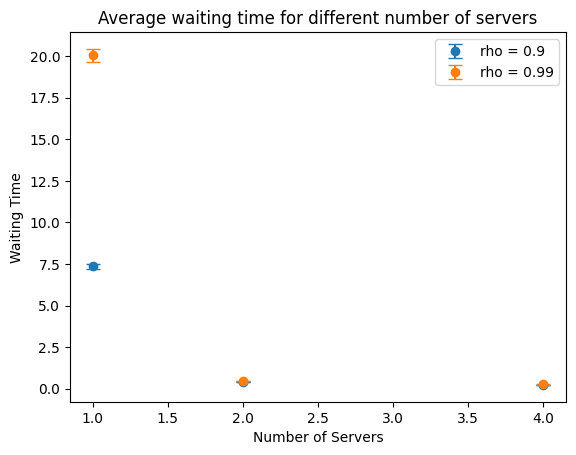

In [16]:
plt.errorbar(n, means_waiting, yerr=stdev_waiting, fmt='o', capsize=5, label='rho = 0.9')
plt.errorbar(n, means_waiting_rho, yerr=stdev_waiting_rho, fmt='o', capsize=5, label='rho = 0.99')
plt.legend()
plt.xlabel('Number of Servers')
plt.ylabel('Waiting Time')
plt.title('Average waiting time for different number of servers')

In [17]:
means_waiting_rho

[20.053603371250713, 0.4703257897217494, 0.2498344545244384]

In [18]:
stdev_waiting_rho

[0.38442029207616657, 0.0021109772526680336, 0.0008903453478518832]

In [21]:
# Compute the 95% confidence intervals
intervals = list()
for i in range(len(means_waiting)):
    intervals.append(confidence_interval(means_waiting_rho[i], stdev_waiting_rho[i]))
print(intervals)

[[19.300139598781428, 20.807067143719998], [0.46618827430652005, 0.4744633051369787], [0.2480893776426487, 0.2515795314062281]]


## Question 3

In [10]:
class Priority_Servers(object):
    """
    Class to simulate behaviour of the servers that prioritze lower values.
    """

    def __init__(self, env, n, service_time):
        """
        Initialize Server object.
        """

        self.env = env
        self.server = sim.PriorityResource(env, n)
        self.waiting_times = list()
        self.service_times = list()

    def processing(self, service_time):
        self.service_times.append(np.random.exponential(service_rate))
        yield self.env.timeout(self.service_times[-1])

In [11]:
def simulation_priority(n, no_customers, service_time, arrival_rate, run_time) -> list:
    env = sim.Environment()
    servers = Priority_Servers(env, n, service_time)
    env.process(setup(env, servers, n, no_customers, service_time, arrival_rate))
    env.run(until=run_time)
    return servers.waiting_times, servers.service_times

#### Run priority queue for rho 0.9

In [24]:
# Base parameters for rho=0.9
no_customers = 1000
service_rate = 0.90
arrival_rate = 1
total_time = 100000

# Simulation parameters
no_simulations = 1000
n = [1, 2, 4]

In [25]:
means_waiting = list()
stdev_waiting = list()

# Go through different number of servers.
for i in n:
    waiting = list()
    service = list()

    # Go through the number of simulationes needed.
    for j in range(no_simulations):
        simu = simulation_priority(i, no_customers, service_rate, arrival_rate, total_time)
        waiting.append(np.mean(simu[0]))

    # Store the results for each n.
    means_waiting.append(np.mean(waiting))
    stdev_waiting.append(sp.sem(waiting))

    print(f'Simulations for {i} servers done.')

Simulations for 1 servers done.
Simulations for 2 servers done.
Simulations for 4 servers done.


In [26]:
means_waiting

[7.342210091483734, 0.37666170877021965, 0.2254833710566472]

In [27]:
stdev_waiting

[0.12186408258270526, 0.0015978754837997265, 0.0007635675277581048]

In [33]:
# Compute the 95% confidence intervals
intervals = list()
for i in range(len(means_waiting)):
    intervals.append(confidence_interval(means_waiting[i], stdev_waiting[i]))
print(intervals)

[[7.103356489621632, 7.581063693345836], [0.3735298728219722, 0.3797935447184671], [0.22398677870224132, 0.2269799634110531]]


#### Run priority queue for rho 0.99

In [36]:
# Base parameters for rho=0.99
no_customers = 1000
service_rate = 0.99
arrival_rate = 1
total_time = 100000

# Simulation parameters
no_simulations = 1000
n = [1, 2, 4]

In [37]:
means_waiting_rho = list()
stdev_waiting_rho = list()

# Go through different number of servers.
for i in n:
    waiting = list()

    # Go through the number of simulationes needed.
    for j in range(no_simulations):
        simu = simulation_priority(i, no_customers, service_rate, arrival_rate, total_time)
        waiting.append(np.mean(simu[0]))

    # Store the results for each n.
    means_waiting_rho.append(np.mean(waiting))
    stdev_waiting_rho.append(sp.sem(waiting))

    print(f'Simulations for {i} servers done.')

Simulations for 1 servers done.
Simulations for 2 servers done.
Simulations for 4 servers done.


Text(0.5, 1.0, 'Average waiting time for different number of servers')

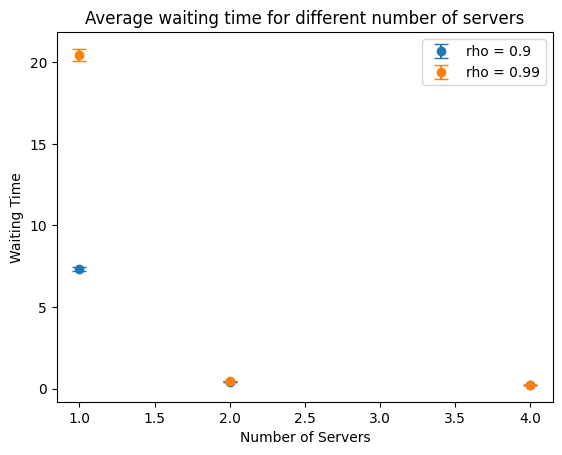

In [38]:
plt.errorbar(n, means_waiting, yerr=stdev_waiting, fmt='o', capsize=5, label='rho = 0.9')
plt.errorbar(n, means_waiting_rho, yerr=stdev_waiting_rho, fmt='o', capsize=5, label='rho = 0.99')
plt.legend()
plt.xlabel('Number of Servers')
plt.ylabel('Waiting Time')
plt.title('Average waiting time for different number of servers')

In [39]:
means_waiting_rho

[20.439480012559386, 0.47392196608899234, 0.24813487855151425]

In [40]:
stdev_waiting_rho

[0.38108719297191296, 0.002179922957114493, 0.0008633745188588471]

In [34]:
# Compute the 95% confidence intervals
intervals = list()
for i in range(len(means_waiting)):
    intervals.append(confidence_interval(means_waiting_rho[i], stdev_waiting_rho[i]))
print(intervals)

[[19.50477085597101, 21.018906242830134], [0.46541221399393645, 0.4739291336571633], [0.24973319059521681, 0.2532268711812454]]


## Question 4

#### Simulations for M/D/1 and M/D/n queues, rho=0.90

In [76]:
class MD_Servers(object):
    """
    Class to simulate behaviour of the servers that prioritze lower values.
    """

    def __init__(self, env, n, service_time):
        """
        Initialize Server object.
        """

        self.env = env
        self.server = sim.Resource(env, n)
        self.service_time = service_time
        self.waiting_times = list()
        self.service_times = list()

    def processing(self, service_time):
        self.service_times.append(service_time)
        yield self.env.timeout(self.service_time)

In [77]:
def simulation_md(n, no_customers, service_time, arrival_rate, run_time) -> list:
    env = sim.Environment()
    servers = MD_Servers(env, n, service_time)
    env.process(setup(env, servers, n, no_customers, service_time, arrival_rate))
    env.run(until=run_time)
    return servers.waiting_times, servers.service_times

In [79]:
# Base parameters for rho=0.9
no_customers = 1000
service_rate = 0.90
arrival_rate = 1
total_time = 100000

# Simulation parameters
no_simulations = 1000
n = [1, 2, 4]

In [80]:
means_waiting = list()
stdev_waiting = list()

# Go through different number of servers.
for i in n:
    waiting = list()
    service = list()

    # Go through the number of simulationes needed.
    for j in range(no_simulations):
        simu = simulation_md(i, no_customers, service_rate, arrival_rate, total_time)
        waiting.append(np.mean(simu[0]))

    # Store the results for each n.
    means_waiting.append(np.mean(waiting))
    stdev_waiting.append(sp.sem(waiting))

    print(f'Simulations for {i} servers done.')

Simulations for 1 servers done.
Simulations for 2 servers done.
Simulations for 4 servers done.


Text(0.5, 1.0, 'Average waiting time for different number of servers')

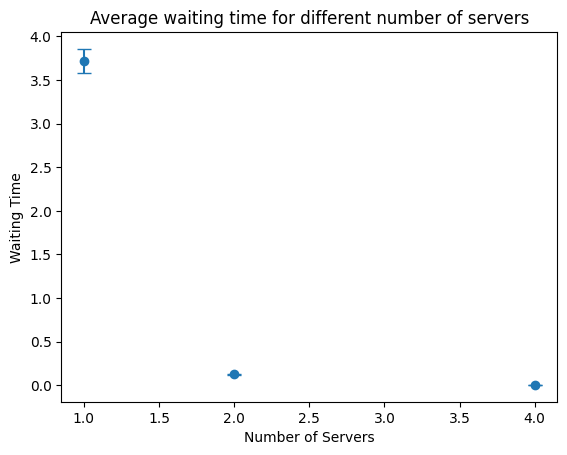

In [49]:
plt.errorbar(n, means_waiting, yerr=stdev_waiting, fmt='o', capsize=5, label='Data with Error Bars')
plt.xlabel('Number of Servers')
plt.ylabel('Waiting Time')
plt.title('Average waiting time for different number of servers')

In [81]:
means_waiting

[3.766497636330993, 0.1218106972072134, 0.002849850065013162]

In [82]:
stdev_waiting

[0.04661946583143784, 0.0005820748746152501, 4.379110284596981e-05]

In [83]:
# Compute the 95% confidence intervals
intervals = list()
for i in range(len(means_waiting)):
    intervals.append(confidence_interval(means_waiting[i], stdev_waiting[i]))
print(intervals)

[[3.6751234833013746, 3.8578717893606114], [0.1206698304529675, 0.12295156396145929], [0.0027640195034350614, 0.002935680626591263]]


#### Simulations for rho=0.99

In [84]:
# Base parameters for rho=0.99
no_customers = 1000
service_rate = 0.99
arrival_rate = 1
total_time = 100000

# Simulation parameters
no_simulations = 1000
n = [1, 2, 4]

In [85]:
means_waiting = list()
stdev_waiting = list()

# Go through different number of servers.
for i in n:
    waiting = list()
    service = list()

    # Go through the number of simulationes needed.
    for j in range(no_simulations):
        simu = simulation_md(i, no_customers, service_rate, arrival_rate, total_time)
        waiting.append(np.mean(simu[0]))

    # Store the results for each n.
    means_waiting.append(np.mean(waiting))
    stdev_waiting.append(sp.sem(waiting))

    print(f'Simulations for {i} servers done.')

Simulations for 1 servers done.
Simulations for 2 servers done.
Simulations for 4 servers done.


In [87]:
means_waiting

[13.74237701680854, 0.1696356062460668, 0.004292148623649119]

In [88]:
stdev_waiting

[0.25347348475359216, 0.0008227715378228933, 5.815386133363762e-05]

In [86]:
# Compute the 95% confidence intervals
intervals = list()
for i in range(len(means_waiting)):
    intervals.append(confidence_interval(means_waiting[i], stdev_waiting[i]))
print(intervals)

[[13.245568986691499, 14.23918504692558], [0.16802297403193392, 0.17124823846019968], [0.004178167055435189, 0.004406130191863049]]


#### Simulations for long-tail distrbution queues

In [54]:
class Long_Tail_Servers(object):
    """
    Class to simulate behaviour of the servers where 25% of the jobs have a longer
    service time. In other words, a long-tail distribution.
    """

    def __init__(self, env, n, service_time):
        """
        Initialize Server object.
        """

        self.env = env
        self.server = sim.Resource(env, n)
        self.waiting_times = list()
        self.service_times = list()

    def processing(self, service_time):
        x = np.random.rand()

        # 75% should have a service rate with mean 1
        if x >= 0.25:
            self.service_times.append(np.random.exponential(1))
            yield self.env.timeout(self.service_times[-1])

        # 25% should have a service rate with mean 1
        else:
            self.service_times.append(np.random.exponential(5))
            yield self.env.timeout(self.service_times[-1])

In [55]:
def simulation_long_tail(n, no_customers, service_time, arrival_rate, run_time) -> list:
    env = sim.Environment()
    servers = Long_Tail_Servers(env, n, service_time)
    env.process(setup(env, servers, n, no_customers, service_time, arrival_rate))
    env.run(until=run_time)
    return servers.waiting_times, servers.service_times

In [56]:
# Base parameters for rho=0.9
no_customers = 1000
service_rate = 0.90
arrival_rate = 1
total_time = 10000000

# Simulation parameters
no_simulations = 1000
n = [1, 2, 4]

In [69]:
means_waiting = list()
stdev_waiting = list()
means_service = list()
stdev_service = list()

# Go through different number of servers.
for i in n:
    waiting = list()
    service = list()

    # Go through the number of simulationes needed.
    for j in range(no_simulations):
        simu = simulation_long_tail(i, no_customers, service_rate, arrival_rate, total_time)
        waiting.append(np.mean(simu[0]))
        service.append(np.mean(simu[1]))

    # Store the results for each n.
    means_waiting.append(np.mean(waiting))
    stdev_waiting.append(sp.sem(waiting))
    means_service.append(np.mean(service))
    stdev_service.append(sp.sem(service))

    print(f'Simulations for {i} servers done.')

Simulations for 1 servers done.
Simulations for 2 servers done.
Simulations for 4 servers done.


In [70]:
means_service

[1.9992136861619516, 2.002363345438695, 2.001107358488345]

In [71]:
stdev_service

[0.003050092824973933, 0.0032183300360137156, 0.0031005990221111977]

In [72]:
# Compute the 95% confidence intervals
intervals = list()
for i in range(len(means_waiting)):
    intervals.append(confidence_interval(means_service[i], stdev_service[i]))
print(intervals)

[[1.9932355042250027, 2.0051918680989007], [1.996055418568108, 2.008671272309282], [1.9950301844050071, 2.007184532571683]]


In [73]:
means_waiting

[501.44129481810904, 28.846890822429838, 0.764075638535089]

In [74]:
stdev_waiting

[1.8307469736327693, 0.5702173806700068, 0.004838875455405226]

In [75]:
# Compute the 95% confidence intervals
intervals = list()
for i in range(len(means_waiting)):
    intervals.append(confidence_interval(means_waiting[i], stdev_waiting[i]))
print(intervals)

[[497.85303074978884, 505.02955888642924], [27.729264756316624, 29.964516888543052], [0.7545914426424948, 0.7735598344276832]]


##### Compute M/M/n again to compare against long tail

In [63]:
# Base parameters for rho=0.9
no_customers = 1000
service_rate = 0.90
arrival_rate = 1
total_time = 10000000

# Simulation parameters
no_simulations = 1000
n = [1, 2, 4]

In [64]:
means_waiting = list()
stdev_waiting = list()
means_service = list()
stdev_service = list()

# Go through different number of servers.
for i in n:
    waiting = list()
    service = list()

    # Go through the number of simulationes needed.
    for j in range(no_simulations):
        simu = simulation(i, no_customers, service_rate, arrival_rate, total_time)
        waiting.append(np.mean(simu[0]))
        service.append(np.mean(simu[1]))

    # Store the results for each n.
    means_waiting.append(np.mean(waiting))
    stdev_waiting.append(sp.sem(waiting))
    means_service.append(np.mean(service))
    stdev_service.append(sp.sem(service))

    print(f'Simulations for {i} servers done.')

Simulations for 1 servers done.
Simulations for 2 servers done.
Simulations for 4 servers done.


In [65]:
means_service

[0.8991995901257669, 0.8998597200694278, 0.900714335041834]

In [66]:
stdev_service

[0.0009003914694884863, 0.0009200043806264634, 0.0009057327403934518]

In [68]:
# Compute the 95% confidence intervals
intervals = list()
for i in range(len(means_waiting)):
    intervals.append(confidence_interval(means_service[i], stdev_service[i]))
print(intervals)

[[0.8974348228455694, 0.9009643574059644], [0.8980565114833999, 0.9016629286554557], [0.8989390988706628, 0.9024895712130051]]
